<a href="https://colab.research.google.com/github/sgevatschnaider/Grafos/blob/main/ntebooks/%20Sistemas_Jer%C3%A1rquicos_Multi%E2%80%91Agente_(HMAS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

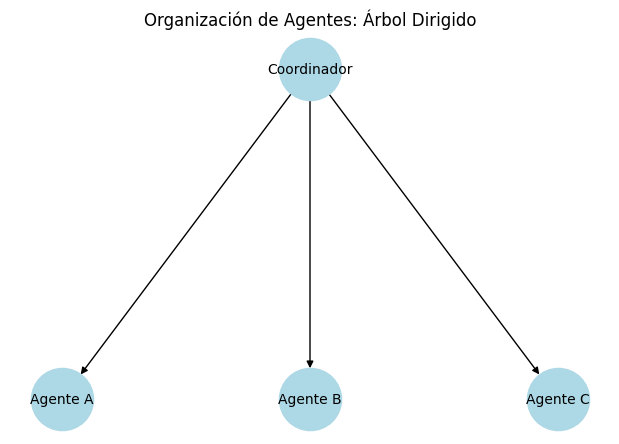

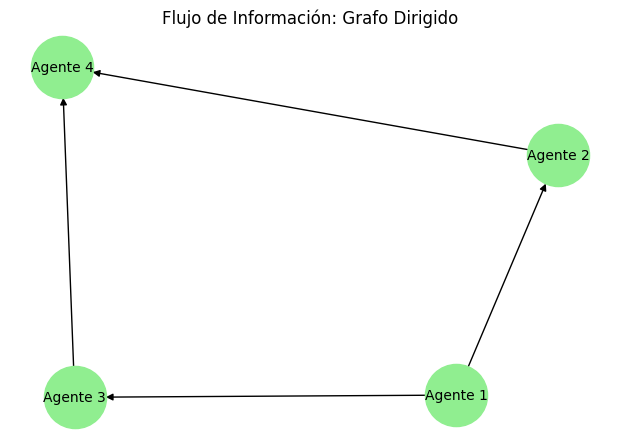

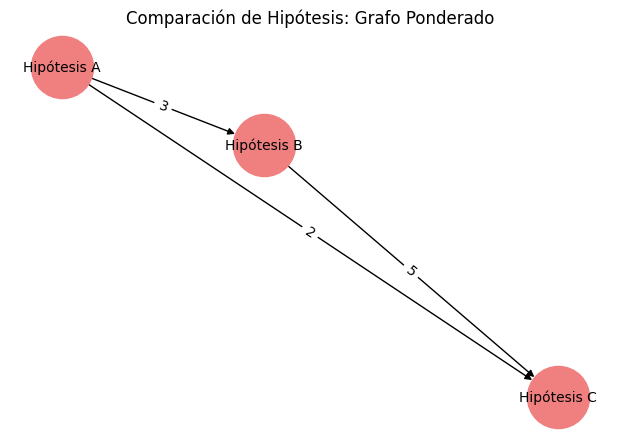

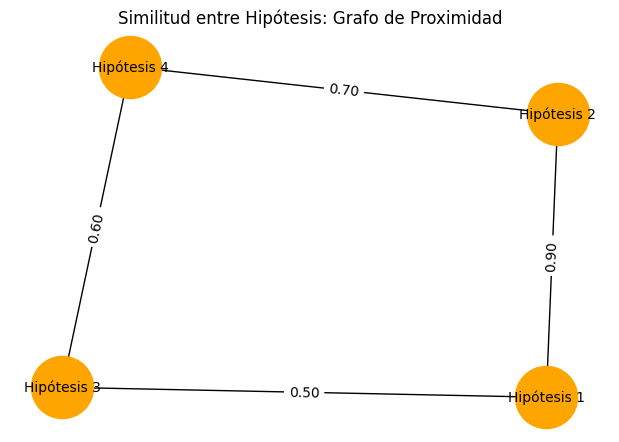

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def hierarchy_pos(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
    """
    Calcula posiciones para un grafo en forma jerárquica.
    G: grafo (se asume que es un DiGraph)
    root: nodo raíz
    width: ancho total disponible para la distribución horizontal
    vert_gap: espacio vertical entre niveles
    vert_loc: posición vertical del nodo raíz
    xcenter: posición horizontal central para el nodo raíz
    pos: diccionario de posiciones (interno)
    parent: nodo padre (interno)
    """
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)

    # Obtener los hijos del nodo (sucesores)
    children = list(G.successors(root))
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width/2 + dx/2
        for child in children:
            pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc - vert_gap, xcenter=nextx,
                                pos=pos, parent=root)
            nextx += dx
    return pos

# 1. Organización de agentes: Árbol dirigido sin pygraphviz
def draw_hierarchical_tree():
    # Crear grafo dirigido (árbol)
    G = nx.DiGraph()

    # Nodo principal y agentes subordinados
    G.add_node("Coordinador")
    agentes = ["Agente A", "Agente B", "Agente C"]
    G.add_nodes_from(agentes)

    # Conectar el coordinador con cada agente
    for agente in agentes:
        G.add_edge("Coordinador", agente)

    # Usar la función personalizada para obtener posiciones jerárquicas
    pos = hierarchy_pos(G, "Coordinador")

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, arrows=True,
            node_color='lightblue', node_size=2000, font_size=10)
    plt.title("Organización de Agentes: Árbol Dirigido")
    plt.show()

# 2. Flujo de Información: Grafo dirigido (sin cambios)
def draw_information_flow_graph():
    G = nx.DiGraph()
    nodos = ["Agente 1", "Agente 2", "Agente 3", "Agente 4"]
    G.add_nodes_from(nodos)
    edges = [("Agente 1", "Agente 2"), ("Agente 1", "Agente 3"),
             ("Agente 2", "Agente 4"), ("Agente 3", "Agente 4")]
    G.add_edges_from(edges)

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, arrows=True,
            node_color='lightgreen', node_size=2000, font_size=10)
    plt.title("Flujo de Información: Grafo Dirigido")
    plt.show()

# 3. Comparación de Hipótesis: Grafo ponderado (Ranking Agent)
def draw_weighted_graph():
    G = nx.DiGraph()
    hypotheses = ["Hipótesis A", "Hipótesis B", "Hipótesis C"]
    G.add_nodes_from(hypotheses)
    G.add_edge("Hipótesis A", "Hipótesis B", weight=3)
    G.add_edge("Hipótesis B", "Hipótesis C", weight=5)
    G.add_edge("Hipótesis A", "Hipótesis C", weight=2)

    pos = nx.spring_layout(G, seed=7)

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, arrows=True,
            node_color='lightcoral', node_size=2000, font_size=10)

    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

    plt.title("Comparación de Hipótesis: Grafo Ponderado")
    plt.show()

# 4. Similitud entre Hipótesis: Grafo de proximidad
def draw_similarity_graph():
    G = nx.Graph()
    hypotheses = ["Hipótesis 1", "Hipótesis 2", "Hipótesis 3", "Hipótesis 4"]
    G.add_nodes_from(hypotheses)
    G.add_edge("Hipótesis 1", "Hipótesis 2", weight=0.9)
    G.add_edge("Hipótesis 1", "Hipótesis 3", weight=0.5)
    G.add_edge("Hipótesis 2", "Hipótesis 4", weight=0.7)
    G.add_edge("Hipótesis 3", "Hipótesis 4", weight=0.6)

    pos = nx.spring_layout(G, seed=10)

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True,
            node_color='orange', node_size=2000, font_size=10)

    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

    plt.title("Similitud entre Hipótesis: Grafo de Proximidad")
    plt.show()

if __name__ == '__main__':
    draw_hierarchical_tree()
    draw_information_flow_graph()
    draw_weighted_graph()
    draw_similarity_graph()


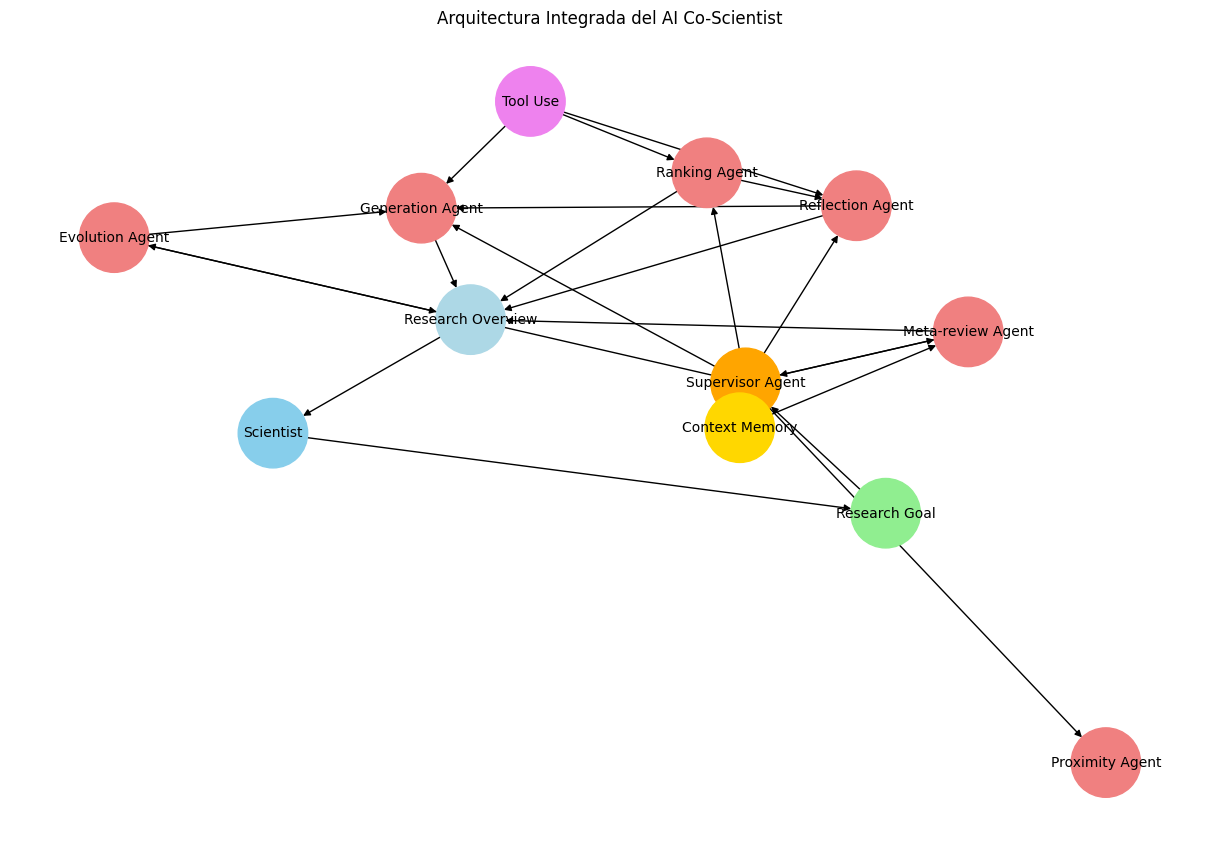

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_co_scientist_architecture():
    G = nx.DiGraph()

    # Definir los nodos con su categoría
    nodes = {
        "Scientist": "User",
        "Research Goal": "Input",
        "Supervisor Agent": "Core",
        "Generation Agent": "Specialized",
        "Reflection Agent": "Specialized",
        "Ranking Agent": "Specialized",
        "Proximity Agent": "Specialized",
        "Evolution Agent": "Specialized",
        "Meta-review Agent": "Specialized",
        "Context Memory": "Memory",
        "Research Overview": "Output",
        "Tool Use": "Tool"
    }

    for node, group in nodes.items():
        G.add_node(node, group=group)

    # Definir las conexiones (flujo de información y retroalimentación)
    edges = [
        ("Scientist", "Research Goal"),
        ("Research Goal", "Supervisor Agent"),
        ("Supervisor Agent", "Generation Agent"),
        ("Supervisor Agent", "Reflection Agent"),
        ("Supervisor Agent", "Ranking Agent"),
        ("Supervisor Agent", "Proximity Agent"),
        ("Supervisor Agent", "Evolution Agent"),
        ("Supervisor Agent", "Meta-review Agent"),
        ("Generation Agent", "Research Overview"),
        ("Reflection Agent", "Research Overview"),
        ("Ranking Agent", "Research Overview"),
        ("Evolution Agent", "Research Overview"),
        ("Meta-review Agent", "Research Overview"),
        ("Research Overview", "Scientist"),
        # Feedback y retroalimentación entre agentes:
        ("Meta-review Agent", "Supervisor Agent"),
        ("Ranking Agent", "Reflection Agent"),
        ("Reflection Agent", "Generation Agent"),
        ("Evolution Agent", "Generation Agent"),
        ("Tool Use", "Generation Agent"),
        ("Tool Use", "Reflection Agent"),
        ("Tool Use", "Ranking Agent"),
        # Integración de Context Memory:
        ("Supervisor Agent", "Context Memory"),
        ("Context Memory", "Supervisor Agent"),
        ("Context Memory", "Meta-review Agent")
    ]

    G.add_edges_from(edges)

    # Usar un layout orgánico (spring layout) para visualizar la red
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 8))

    # Asignar colores según la categoría del nodo
    color_map = {
        "User": "skyblue",
        "Input": "lightgreen",
        "Core": "orange",
        "Specialized": "lightcoral",
        "Memory": "gold",
        "Output": "lightblue",
        "Tool": "violet"
    }
    node_colors = [color_map[G.nodes[node]['group']] for node in G.nodes()]

    nx.draw(G, pos, with_labels=True, arrows=True,
            node_color=node_colors, node_size=2500, font_size=10)
    plt.title("Arquitectura Integrada del AI Co-Scientist")
    plt.show()

if __name__ == '__main__':
    draw_co_scientist_architecture()


GIF guardado en: /root/Downloads/ai_co_scientist.gif
MP4 guardado en: /root/Downloads/ai_co_scientist.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

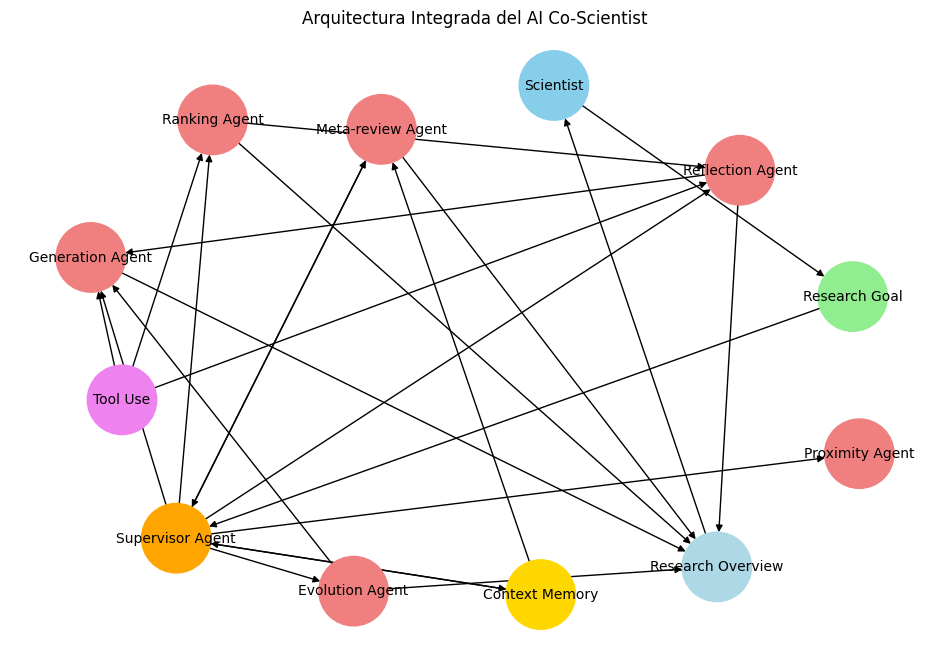

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from google.colab import files  # Para descargar archivos en Colab

def draw_co_scientist_architecture_animation():
    # Crear el grafo completo con nodos y aristas
    G_full = nx.DiGraph()
    nodes = {
        "Scientist": "User",
        "Research Goal": "Input",
        "Supervisor Agent": "Core",
        "Generation Agent": "Specialized",
        "Reflection Agent": "Specialized",
        "Ranking Agent": "Specialized",
        "Proximity Agent": "Specialized",
        "Evolution Agent": "Specialized",
        "Meta-review Agent": "Specialized",
        "Context Memory": "Memory",
        "Research Overview": "Output",
        "Tool Use": "Tool"
    }
    for node, group in nodes.items():
        G_full.add_node(node, group=group)

    edges = [
        ("Scientist", "Research Goal"),
        ("Research Goal", "Supervisor Agent"),
        ("Supervisor Agent", "Generation Agent"),
        ("Supervisor Agent", "Reflection Agent"),
        ("Supervisor Agent", "Ranking Agent"),
        ("Supervisor Agent", "Proximity Agent"),
        ("Supervisor Agent", "Evolution Agent"),
        ("Supervisor Agent", "Meta-review Agent"),
        ("Generation Agent", "Research Overview"),
        ("Reflection Agent", "Research Overview"),
        ("Ranking Agent", "Research Overview"),
        ("Evolution Agent", "Research Overview"),
        ("Meta-review Agent", "Research Overview"),
        ("Research Overview", "Scientist"),
        ("Meta-review Agent", "Supervisor Agent"),
        ("Ranking Agent", "Reflection Agent"),
        ("Reflection Agent", "Generation Agent"),
        ("Evolution Agent", "Generation Agent"),
        ("Tool Use", "Generation Agent"),
        ("Tool Use", "Reflection Agent"),
        ("Tool Use", "Ranking Agent"),
        ("Supervisor Agent", "Context Memory"),
        ("Context Memory", "Supervisor Agent"),
        ("Context Memory", "Meta-review Agent")
    ]

    # Calcular posiciones con el layout de spring (constante para toda la animación)
    pos = nx.spring_layout(G_full, seed=42)

    # Mapeo de colores según la categoría de cada nodo
    color_map = {
        "User": "skyblue",
        "Input": "lightgreen",
        "Core": "orange",
        "Specialized": "lightcoral",
        "Memory": "gold",
        "Output": "lightblue",
        "Tool": "violet"
    }
    node_colors = [color_map[G_full.nodes[node]['group']] for node in G_full.nodes()]

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title("Arquitectura Integrada del AI Co-Scientist")

    # Función de actualización para cada frame de la animación
    def update(frame):
        ax.clear()
        plt.title("Arquitectura Integrada del AI Co-Scientist")
        # Crear un grafo que incluya progresivamente las aristas
        G_anim = nx.DiGraph()
        G_anim.add_nodes_from(G_full.nodes(data=True))
        if frame <= len(edges):
            current_edges = edges[:frame]
        else:
            current_edges = edges
        G_anim.add_edges_from(current_edges)
        nx.draw(G_anim, pos, ax=ax, with_labels=True, arrows=True,
                node_color=node_colors, node_size=2500, font_size=10)

    total_frames = len(edges) + 10  # Frames extra para mantener la imagen final
    ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=500, repeat=True)

    # Asegurarse de que la carpeta "Downloads" exista (en el entorno home)
    downloads_dir = os.path.expanduser("~/Downloads")
    if not os.path.exists(downloads_dir):
        os.makedirs(downloads_dir)

    gif_path = os.path.join(downloads_dir, "ai_co_scientist.gif")
    mp4_path = os.path.join(downloads_dir, "ai_co_scientist.mp4")

    # Guardar el GIF usando PillowWriter
    gif_writer = animation.PillowWriter(fps=2)
    ani.save(gif_path, writer=gif_writer)
    print(f"GIF guardado en: {gif_path}")

    # Guardar el MP4 usando FFMpegWriter
    mp4_writer = animation.FFMpegWriter(fps=2)
    ani.save(mp4_path, writer=mp4_writer)
    print(f"MP4 guardado en: {mp4_path}")

    # Descargar los archivos en Google Colab
    files.download(gif_path)
    files.download(mp4_path)

    plt.show()

if __name__ == '__main__':
    draw_co_scientist_architecture_animation()



Animaciones guardadas como 'bfs_cubo_animacion_secuencial.gif' y 'bfs_cubo_animacion_secuencial.mp4'.
Archivos empaquetados en 'bfs_cubo_animacion.zip'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

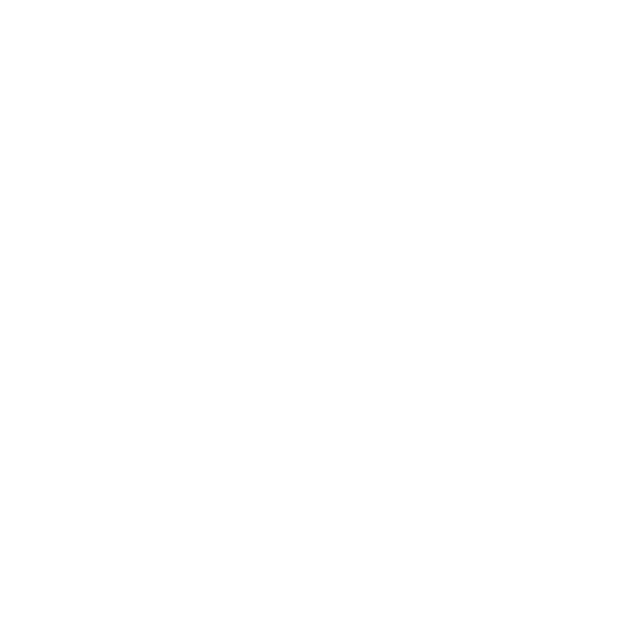

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from google.colab import files  # Para descargar archivos en Colab
import zipfile  # Para empaquetar los archivos en ZIP

# Crear el grafo cubo usando números
G = nx.Graph()
V = range(8)  # Nodos numerados de 0 a 7
G.add_nodes_from(V)
E = [
    (0, 1), (0, 2), (0, 4),
    (1, 3), (1, 5),
    (2, 3), (2, 6),
    (4, 5), (4, 6),
    (3, 7), (5, 7), (6, 7)
]
G.add_edges_from(E)

# Algoritmo BFS para recorrer el grafo
def bfs(graph, start):
    visited = set()
    queue = [start]
    bfs_edges = []
    bfs_nodes = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            neighbors = sorted(list(graph.neighbors(node)))  # Ordenar los vecinos en orden creciente
            for neighbor in neighbors:
                if neighbor not in visited:
                    queue.append(neighbor)
                    bfs_edges.append((node, neighbor))  # Registrar las aristas recorridas
                    bfs_nodes.append(neighbor)
    return bfs_nodes, bfs_edges

# Ejecutar BFS comenzando desde el nodo 0
bfs_nodes, bfs_edges = bfs(G, 0)

# Generar posiciones 3D para los nodos (posición fija para el cubo)
pos_3d = {
    0: (0, 0, 0),
    1: (0, 0, 1),
    2: (0, 1, 0),
    3: (0, 1, 1),
    4: (1, 0, 0),
    5: (1, 0, 1),
    6: (1, 1, 0),
    7: (1, 1, 1)
}

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Función para dibujar el grafo en 3D mostrando el recorrido BFS progresivamente
def draw_graph(ax, G, pos, bfs_edges, bfs_nodes, step):
    ax.clear()
    # Dibujar las aristas recorridas hasta el paso actual
    for edge in bfs_edges[:step]:
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color='red', linewidth=3)  # Aristas en rojo

    # Dibujar los nodos visitados hasta el paso actual
    for node in bfs_nodes[:step]:
        ax.scatter(pos[node][0], pos[node][1], pos[node][2],
                   color='yellow', s=900, edgecolors='black', linewidths=2)  # Nodos en amarillo

    # Añadir etiquetas solo para nodos visitados
    for node in bfs_nodes[:step]:
        ax.text(pos[node][0], pos[node][1], pos[node][2], str(node),
                color='black', fontsize=14, ha='center', va='center', weight='bold')

    # Configurar límites de los ejes y estética
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_zlim(-0.5, 1.5)
    ax.set_axis_off()

# Dibujar el grafo inicialmente
draw_graph(ax, G, pos_3d, bfs_edges, bfs_nodes, step=0)

# Función de actualización para la animación de BFS
def update_bfs(step):
    draw_graph(ax, G, pos_3d, bfs_edges, bfs_nodes, step)
    # Rotar la vista para dinamismo
    ax.view_init(elev=30, azim=step * 10)
    return fig,

# Crear la animación
total_frames = len(bfs_nodes)
ani = animation.FuncAnimation(fig, update_bfs, frames=total_frames, interval=1000, blit=False)

# Rutas de guardado para GIF y MP4
gif_path = 'bfs_cubo_animacion_secuencial.gif'
mp4_path = 'bfs_cubo_animacion_secuencial.mp4'

# Guardar animación como GIF usando PillowWriter
ani.save(gif_path, writer='pillow', fps=1)
# Guardar animación como MP4 usando ffmpeg
ani.save(mp4_path, writer='ffmpeg', fps=1)

print(f"Animaciones guardadas como '{gif_path}' y '{mp4_path}'.")

# Empaquetar ambos archivos en un ZIP
zip_filename = 'bfs_cubo_animacion.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(gif_path)
    zipf.write(mp4_path)

print(f"Archivos empaquetados en '{zip_filename}'.")

# Descargar el archivo ZIP en Google Colab
files.download(zip_filename)

# Mostrar la animación en el notebook
HTML(ani.to_jshtml())


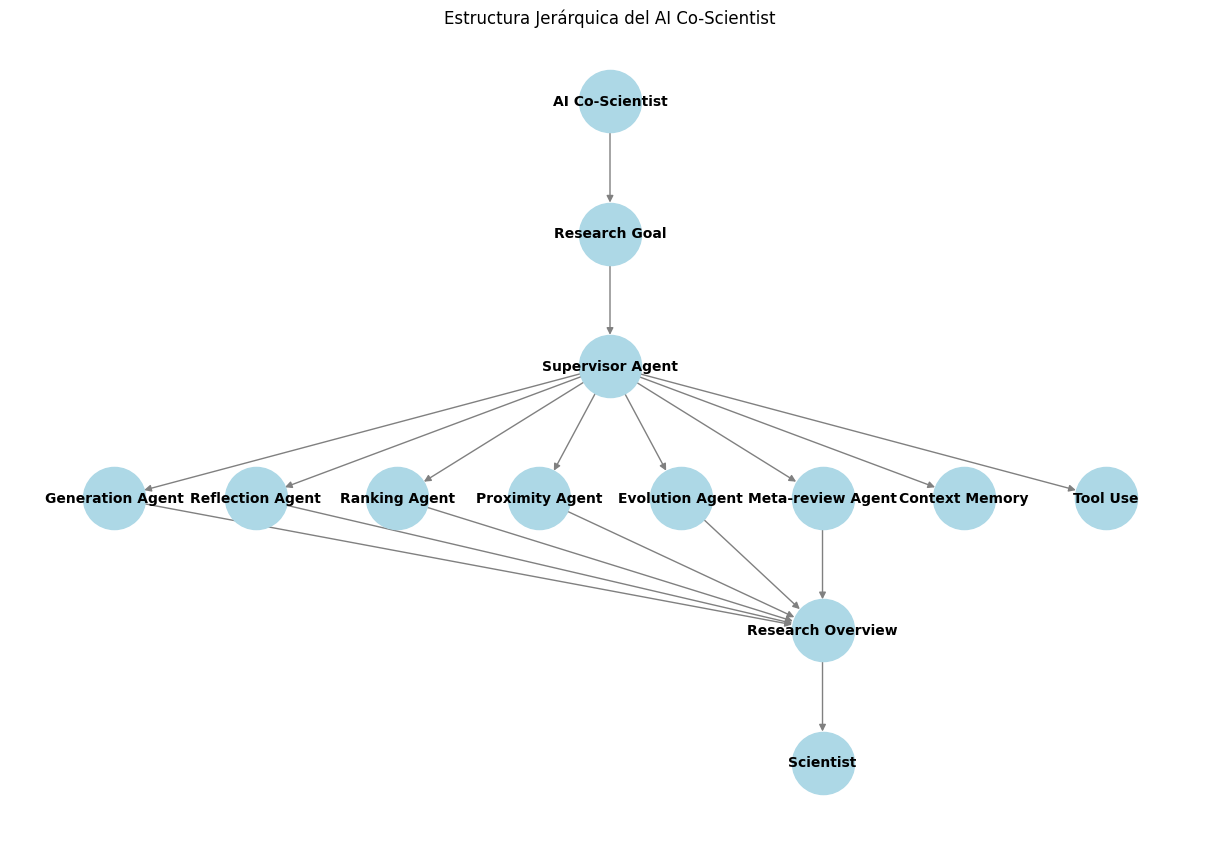

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def hierarchy_pos(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
    """
    Posiciona los nodos de G en forma jerárquica.

    G: un grafo dirigido (DiGraph)
    root: el nodo raíz de la jerarquía
    width: ancho total para distribuir los nodos horizontalmente
    vert_gap: espacio vertical entre niveles
    vert_loc: coordenada vertical del nodo raíz
    xcenter: posición horizontal central para el nodo raíz
    pos: diccionario de posiciones (interno)
    parent: nodo padre (interno)

    Devuelve: diccionario con las posiciones de cada nodo.
    """
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.successors(root))
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width/2 + dx/2
        for child in children:
            pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc - vert_gap, xcenter=nextx,
                                pos=pos, parent=root)
            nextx += dx
    return pos

def main():
    # Crear el grafo dirigido
    G = nx.DiGraph()

    # Nodo raíz
    G.add_node("AI Co-Scientist")

    # Nivel 1: Entrada (objetivo de investigación)
    G.add_node("Research Goal")
    G.add_edge("AI Co-Scientist", "Research Goal")

    # Nivel 2: Supervisor que orquesta el sistema
    G.add_node("Supervisor Agent")
    G.add_edge("Research Goal", "Supervisor Agent")

    # Nivel 3: Agentes especializados
    specialized_agents = [
        "Generation Agent",
        "Reflection Agent",
        "Ranking Agent",
        "Proximity Agent",
        "Evolution Agent",
        "Meta-review Agent"
    ]
    for agent in specialized_agents:
        G.add_node(agent)
        G.add_edge("Supervisor Agent", agent)

    # Nivel 4: Componentes de soporte
    G.add_node("Context Memory")
    G.add_node("Tool Use")
    G.add_edge("Supervisor Agent", "Context Memory")
    G.add_edge("Supervisor Agent", "Tool Use")

    # Nivel 5: Salida final (resultado de la generación)
    G.add_node("Research Overview")
    # Conectar los agentes especializados a la salida
    for agent in specialized_agents:
        G.add_edge(agent, "Research Overview")
    # Retroalimentación: la salida se envía al científico
    G.add_node("Scientist")
    G.add_edge("Research Overview", "Scientist")

    # Obtener posiciones usando el layout jerárquico
    pos = hierarchy_pos(G, root="AI Co-Scientist", width=2.0, vert_gap=0.3)

    # Dibujar el grafo
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color="lightblue",
            font_size=10, font_weight="bold", edge_color="gray")
    plt.title("Estructura Jerárquica del AI Co-Scientist")
    plt.show()

if __name__ == "__main__":
    main()


GIF guardado en: ai_co_scientist_hierarchical.gif
MP4 guardado en: ai_co_scientist_hierarchical.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

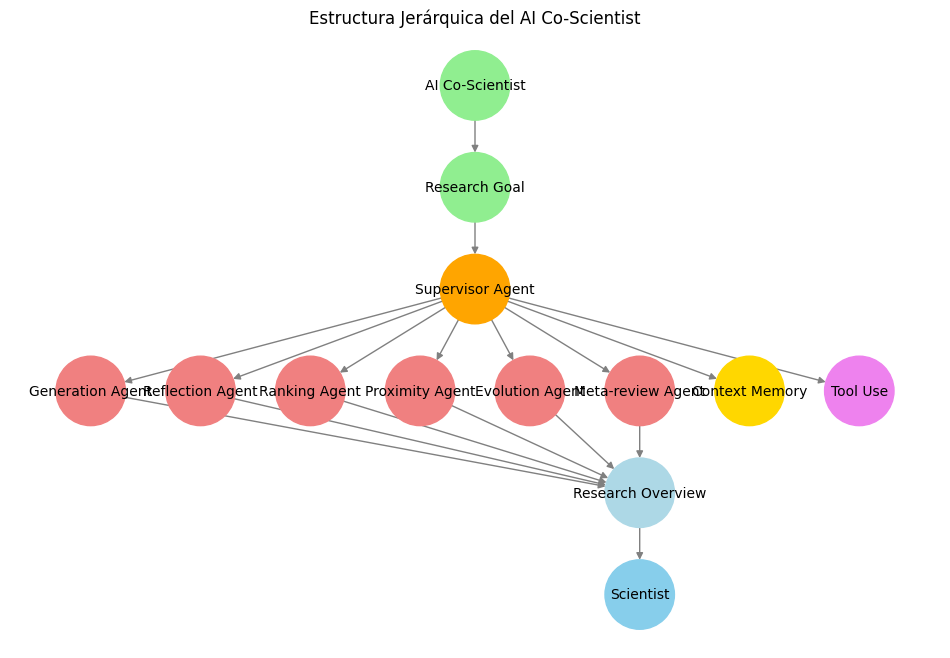

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from google.colab import files  # Para descargar archivos en Colab

def hierarchy_pos(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
    """
    Posiciona los nodos de G en forma jerárquica (layout en árbol).

    G: grafo dirigido (DiGraph)
    root: nodo raíz
    width: ancho total para distribuir los nodos horizontalmente
    vert_gap: separación vertical entre niveles
    vert_loc: coordenada vertical del nodo raíz
    xcenter: posición horizontal central para el nodo raíz
    pos: diccionario de posiciones (interno)
    parent: nodo padre (interno)

    Devuelve: diccionario con las posiciones de cada nodo.
    """
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.successors(root))
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width/2 + dx/2
        for child in children:
            pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc - vert_gap, xcenter=nextx,
                                pos=pos, parent=root)
            nextx += dx
    return pos

def draw_hierarchical_animation():
    # Crear el grafo dirigido con estructura jerárquica
    G = nx.DiGraph()

    # Nodo raíz
    G.add_node("AI Co-Scientist")
    # Nivel 1: Entrada
    G.add_node("Research Goal")
    G.add_edge("AI Co-Scientist", "Research Goal")

    # Nivel 2: Supervisor
    G.add_node("Supervisor Agent")
    G.add_edge("Research Goal", "Supervisor Agent")

    # Nivel 3: Agentes especializados
    specialized_agents = [
        "Generation Agent",
        "Reflection Agent",
        "Ranking Agent",
        "Proximity Agent",
        "Evolution Agent",
        "Meta-review Agent"
    ]
    for agent in specialized_agents:
        G.add_node(agent)
        G.add_edge("Supervisor Agent", agent)

    # Nivel 4: Componentes de soporte
    G.add_node("Context Memory")
    G.add_node("Tool Use")
    G.add_edge("Supervisor Agent", "Context Memory")
    G.add_edge("Supervisor Agent", "Tool Use")

    # Nivel 5: Salida final y retroalimentación
    G.add_node("Research Overview")
    for agent in specialized_agents:
        G.add_edge(agent, "Research Overview")
    G.add_node("Scientist")
    G.add_edge("Research Overview", "Scientist")

    # Convertir el grafo en dirigido (ya lo es) y obtener la lista de aristas en un orden fijo
    edge_list = list(G.edges())

    # Calcular posiciones usando el layout jerárquico
    pos = hierarchy_pos(G, root="AI Co-Scientist", width=2.0, vert_gap=0.3)

    # Definir colores para cada tipo de nodo
    color_map = {
        "AI Co-Scientist": "lightgreen",
        "Research Goal": "lightgreen",
        "Supervisor Agent": "orange",
        "Generation Agent": "lightcoral",
        "Reflection Agent": "lightcoral",
        "Ranking Agent": "lightcoral",
        "Proximity Agent": "lightcoral",
        "Evolution Agent": "lightcoral",
        "Meta-review Agent": "lightcoral",
        "Context Memory": "gold",
        "Tool Use": "violet",
        "Research Overview": "lightblue",
        "Scientist": "skyblue"
    }
    node_colors = [color_map[node] for node in G.nodes()]

    # Configurar figura
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title("Estructura Jerárquica del AI Co-Scientist")

    # Función de actualización de la animación
    def update(frame):
        ax.clear()
        plt.title("Estructura Jerárquica del AI Co-Scientist")
        # Construir un subgrafo con las aristas acumuladas hasta el frame actual
        G_anim = nx.DiGraph()
        G_anim.add_nodes_from(G.nodes(data=True))
        if frame <= len(edge_list):
            current_edges = edge_list[:frame]
        else:
            current_edges = edge_list
        G_anim.add_edges_from(current_edges)
        nx.draw(G_anim, pos, ax=ax, with_labels=True, arrows=True,
                node_color=node_colors, node_size=2500, font_size=10, edge_color="gray")

    total_frames = len(edge_list) + 10  # Algunos frames extra para mantener la imagen final
    ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=500, repeat=True)

    # Rutas de guardado en el directorio actual (/content)
    gif_path = "ai_co_scientist_hierarchical.gif"
    mp4_path = "ai_co_scientist_hierarchical.mp4"

    # Guardar animación como GIF con PillowWriter
    gif_writer = animation.PillowWriter(fps=2)
    ani.save(gif_path, writer=gif_writer)
    print(f"GIF guardado en: {gif_path}")

    # Guardar animación como MP4 con FFMpegWriter
    mp4_writer = animation.FFMpegWriter(fps=2)
    ani.save(mp4_path, writer=mp4_writer)
    print(f"MP4 guardado en: {mp4_path}")

    # Descargar archivos (solo en Google Colab)
    try:
        from google.colab import files
        files.download(gif_path)
        files.download(mp4_path)
    except Exception as e:
        print("No se pueden descargar archivos si no se está en Colab.")

    plt.show()

if __name__ == '__main__':
    draw_hierarchical_animation()


GIF guardado en: ai_co_scientist_hierarchical.gif
MP4 guardado en: ai_co_scientist_hierarchical.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

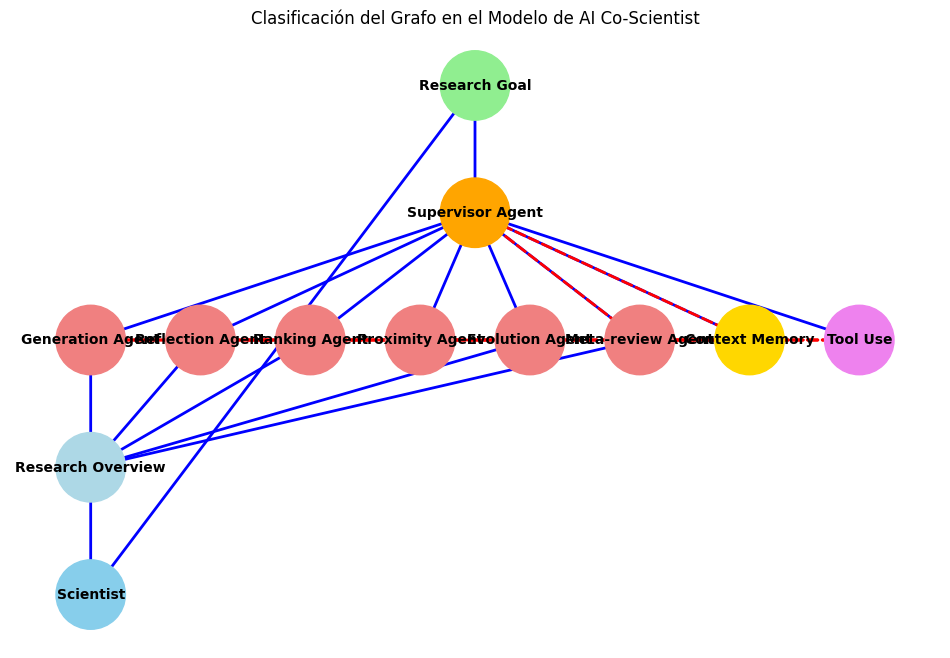

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from google.colab import files

def hierarchy_pos(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, visited=None):
    """
    Calcula posiciones para un grafo dirigido G en forma jerárquica (layout en árbol),
    evitando ciclos mediante un conjunto de nodos ya visitados.

    G: grafo dirigido (DiGraph)
    root: nodo raíz
    width: ancho total para distribuir los nodos horizontalmente
    vert_gap: separación vertical entre niveles
    vert_loc: posición vertical del nodo raíz
    xcenter: posición horizontal del nodo raíz
    pos: diccionario de posiciones para cada nodo (interno)
    visited: conjunto de nodos visitados (interno)

    Devuelve: diccionario con las posiciones de cada nodo.
    """
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    if visited is None:
        visited = {root}
    children = list(G.successors(root))
    if children:
        dx = width / len(children)
        nextx = xcenter - width/2 + dx/2
        for child in children:
            if child in visited:
                continue  # Evitar procesar nuevamente nodos ya visitados (rompe ciclos)
            visited.add(child)
            pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc - vert_gap, xcenter=nextx,
                                pos=pos, visited=visited)
            nextx += dx
    return pos

def draw_animation():
    # Definir nodos y sus categorías (etiquetados)
    nodes = {
        "Scientist": "User",
        "Research Goal": "Input",
        "Supervisor Agent": "Core",
        "Generation Agent": "Specialized",
        "Reflection Agent": "Specialized",
        "Ranking Agent": "Specialized",
        "Proximity Agent": "Specialized",
        "Evolution Agent": "Specialized",
        "Meta-review Agent": "Specialized",
        "Context Memory": "Memory",
        "Tool Use": "Tool",
        "Research Overview": "Output"
    }

    # Definir las aristas con un atributo "type" para diferenciarlas
    # "flow" para el flujo principal y "feedback" para la retroalimentación
    edge_list = [
        {"source": "Scientist",         "target": "Research Goal",      "type": "flow"},
        {"source": "Research Goal",       "target": "Supervisor Agent",   "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Generation Agent",   "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Reflection Agent",   "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Ranking Agent",      "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Proximity Agent",    "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Evolution Agent",    "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Meta-review Agent",  "type": "flow"},
        {"source": "Generation Agent",    "target": "Research Overview",  "type": "flow"},
        {"source": "Reflection Agent",    "target": "Research Overview",  "type": "flow"},
        {"source": "Ranking Agent",       "target": "Research Overview",  "type": "flow"},
        {"source": "Evolution Agent",     "target": "Research Overview",  "type": "flow"},
        {"source": "Meta-review Agent",   "target": "Research Overview",  "type": "flow"},
        {"source": "Research Overview",   "target": "Scientist",          "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Context Memory",     "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Tool Use",           "type": "flow"},
        # Retroalimentación (feedback)
        {"source": "Meta-review Agent",   "target": "Supervisor Agent",   "type": "feedback"},
        {"source": "Ranking Agent",       "target": "Reflection Agent",   "type": "feedback"},
        {"source": "Reflection Agent",    "target": "Generation Agent",   "type": "feedback"},
        {"source": "Evolution Agent",     "target": "Generation Agent",   "type": "feedback"},
        {"source": "Tool Use",            "target": "Generation Agent",   "type": "feedback"},
        {"source": "Tool Use",            "target": "Reflection Agent",   "type": "feedback"},
        {"source": "Tool Use",            "target": "Ranking Agent",      "type": "feedback"},
        {"source": "Context Memory",      "target": "Supervisor Agent",   "type": "feedback"},
        {"source": "Context Memory",      "target": "Meta-review Agent",  "type": "feedback"}
    ]

    # Crear el grafo completo (DiGraph)
    G_full = nx.DiGraph()
    for node, group in nodes.items():
        G_full.add_node(node, group=group)
    # Agregar todas las aristas (para layout, no diferenciamos tipos)
    for edge in edge_list:
        G_full.add_edge(edge["source"], edge["target"])

    # Calcular el layout jerárquico (para efectos de visualización, se ignoran los ciclos)
    pos = hierarchy_pos(G_full, root="Research Goal", width=2.0, vert_gap=0.3)

    # Definir colores para los nodos según su categoría
    color_map = {
        "User": "skyblue",
        "Input": "lightgreen",
        "Core": "orange",
        "Specialized": "lightcoral",
        "Memory": "gold",
        "Tool": "violet",
        "Output": "lightblue"
    }
    node_colors = [color_map[G_full.nodes[node]['group']] for node in G_full.nodes()]

    # Configurar la figura
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title("Clasificación del Grafo en el Modelo de AI Co-Scientist")

    # Definir colores para aristas según su tipo
    edge_colors = {"flow": "blue", "feedback": "red"}

    # Función de actualización para la animación (se añaden aristas progresivamente)
    def update(frame):
        ax.clear()
        plt.title("Clasificación del Grafo en el Modelo de AI Co-Scientist")
        # Crear grafo parcial para la animación
        G_anim = nx.DiGraph()
        G_anim.add_nodes_from(G_full.nodes(data=True))
        # Se agregan aristas según el orden definido en edge_list
        current_edges = edge_list[:frame] if frame <= len(edge_list) else edge_list
        for edge in current_edges:
            G_anim.add_edge(edge["source"], edge["target"], type=edge["type"])
        # Dibujar nodos
        nx.draw_networkx_nodes(G_anim, pos, ax=ax, node_color=node_colors, node_size=2500)
        nx.draw_networkx_labels(G_anim, pos, ax=ax, font_size=10, font_weight="bold")
        # Dibujar aristas según su tipo
        flow_edges = [(u, v) for u, v, d in G_anim.edges(data=True) if d["type"] == "flow"]
        feedback_edges = [(u, v) for u, v, d in G_anim.edges(data=True) if d["type"] == "feedback"]
        nx.draw_networkx_edges(G_anim, pos, edgelist=flow_edges, ax=ax, edge_color=edge_colors["flow"], arrows=True, width=2)
        nx.draw_networkx_edges(G_anim, pos, edgelist=feedback_edges, ax=ax, edge_color=edge_colors["feedback"], arrows=True, style="dashed", width=2)
        ax.set_axis_off()

    total_frames = len(edge_list) + 10  # Frames extra para mantener el estado final
    ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=500, repeat=True)

    # Rutas de guardado en el directorio actual (/content)
    gif_path = "ai_co_scientist_hierarchical.gif"
    mp4_path = "ai_co_scientist_hierarchical.mp4"

    # Guardar animación como GIF usando PillowWriter
    gif_writer = animation.PillowWriter(fps=2)
    ani.save(gif_path, writer=gif_writer)
    print(f"GIF guardado en: {gif_path}")

    # Guardar animación como MP4 usando FFMpegWriter
    mp4_writer = animation.FFMpegWriter(fps=2)
    ani.save(mp4_path, writer=mp4_writer)
    print(f"MP4 guardado en: {mp4_path}")

    # Descargar los archivos en Google Colab
    files.download(gif_path)
    files.download(mp4_path)

    plt.show()

if __name__ == "__main__":
    draw_animation()



GIF guardado en: ai_co_scientist_hierarchical.gif
MP4 guardado en: ai_co_scientist_hierarchical.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

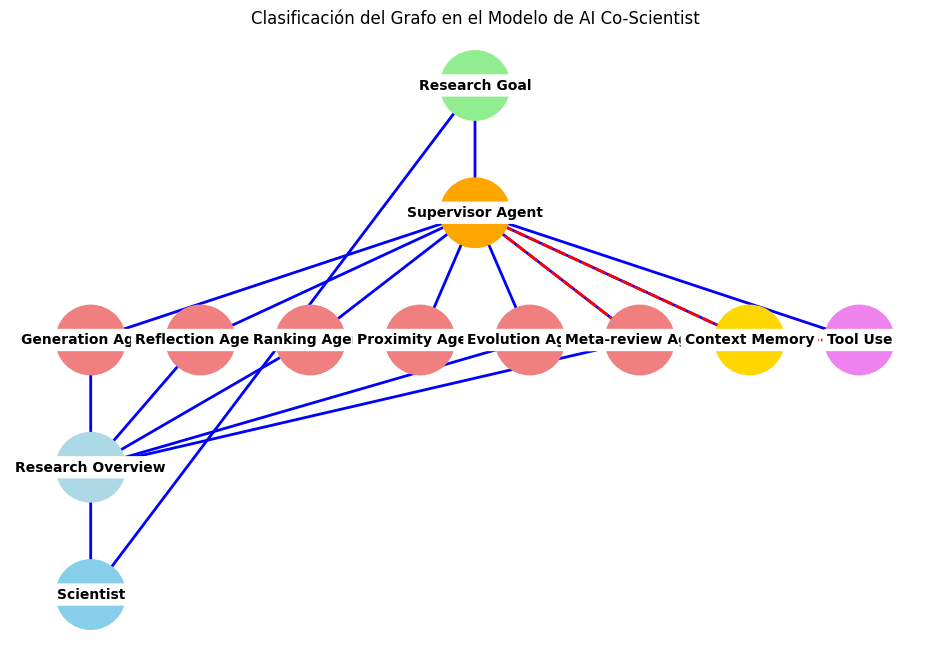

In [ ]:


import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from google.colab import files

def hierarchy_pos(G, root, width=1.0, vert_gap=0.3, vert_loc=0, xcenter=0.5, pos=None, visited=None):
    """
    Calcula posiciones para un grafo dirigido G en forma jerárquica (layout en árbol),
    evitando ciclos mediante un conjunto de nodos ya visitados.
    """
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    if visited is None:
        visited = {root}
    children = list(G.successors(root))
    if children:
        dx = width / len(children)
        nextx = xcenter - width/2 + dx/2
        for child in children:
            if child in visited:
                continue
            visited.add(child)
            pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc - vert_gap, xcenter=nextx,
                                pos=pos, visited=visited)
            nextx += dx
    return pos

def draw_labels(ax, pos, font_size=10):
    """
    Dibuja las etiquetas de los nodos con un fondo (bbox) para mejorar la legibilidad.
    Se centra el texto en cada nodo.
    """
    for node, (x, y) in pos.items():
        ax.text(x, y, node, fontsize=font_size, fontweight="bold",
                ha="center", va="center",
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

def draw_animation():
    # Definir nodos y sus categorías (etiquetados)
    nodes = {
        "Scientist": "User",
        "Research Goal": "Input",
        "Supervisor Agent": "Core",
        "Generation Agent": "Specialized",
        "Reflection Agent": "Specialized",
        "Ranking Agent": "Specialized",
        "Proximity Agent": "Specialized",
        "Evolution Agent": "Specialized",
        "Meta-review Agent": "Specialized",
        "Context Memory": "Memory",
        "Tool Use": "Tool",
        "Research Overview": "Output"
    }

    # Definir aristas con atributo "type" (flow vs. feedback)
    edge_list = [
        {"source": "Scientist",         "target": "Research Goal",      "type": "flow"},
        {"source": "Research Goal",       "target": "Supervisor Agent",   "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Generation Agent",   "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Reflection Agent",   "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Ranking Agent",      "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Proximity Agent",    "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Evolution Agent",    "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Meta-review Agent",  "type": "flow"},
        {"source": "Generation Agent",    "target": "Research Overview",  "type": "flow"},
        {"source": "Reflection Agent",    "target": "Research Overview",  "type": "flow"},
        {"source": "Ranking Agent",       "target": "Research Overview",  "type": "flow"},
        {"source": "Evolution Agent",     "target": "Research Overview",  "type": "flow"},
        {"source": "Meta-review Agent",   "target": "Research Overview",  "type": "flow"},
        {"source": "Research Overview",   "target": "Scientist",          "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Context Memory",     "type": "flow"},
        {"source": "Supervisor Agent",    "target": "Tool Use",           "type": "flow"},
        # Retroalimentación (feedback)
        {"source": "Meta-review Agent",   "target": "Supervisor Agent",   "type": "feedback"},
        {"source": "Ranking Agent",       "target": "Reflection Agent",   "type": "feedback"},
        {"source": "Reflection Agent",    "target": "Generation Agent",   "type": "feedback"},
        {"source": "Evolution Agent",     "target": "Generation Agent",   "type": "feedback"},
        {"source": "Tool Use",            "target": "Generation Agent",   "type": "feedback"},
        {"source": "Tool Use",            "target": "Reflection Agent",   "type": "feedback"},
        {"source": "Tool Use",            "target": "Ranking Agent",      "type": "feedback"},
        {"source": "Context Memory",      "target": "Supervisor Agent",   "type": "feedback"},
        {"source": "Context Memory",      "target": "Meta-review Agent",  "type": "feedback"}
    ]

    # Crear grafo completo
    G_full = nx.DiGraph()
    for node, group in nodes.items():
        G_full.add_node(node, group=group)
    for edge in edge_list:
        G_full.add_edge(edge["source"], edge["target"])

    # Calcular layout jerárquico usando "Research Goal" como raíz
    pos = hierarchy_pos(G_full, root="Research Goal", width=2.0, vert_gap=0.4)

    # Definir colores para nodos según su categoría
    color_map = {
        "User": "skyblue",
        "Input": "lightgreen",
        "Core": "orange",
        "Specialized": "lightcoral",
        "Memory": "gold",
        "Tool": "violet",
        "Output": "lightblue"
    }
    node_colors = [color_map[G_full.nodes[node]['group']] for node in G_full.nodes()]

    # Configurar figura
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title("Clasificación del Grafo en el Modelo de AI Co-Scientist")

    edge_colors = {"flow": "blue", "feedback": "red"}

    def update(frame):
        ax.clear()
        plt.title("Clasificación del Grafo en el Modelo de AI Co-Scientist")
        G_anim = nx.DiGraph()
        G_anim.add_nodes_from(G_full.nodes(data=True))
        current_edges = edge_list[:frame] if frame <= len(edge_list) else edge_list
        for edge in current_edges:
            G_anim.add_edge(edge["source"], edge["target"], type=edge["type"])
        # Dibujar nodos
        nx.draw_networkx_nodes(G_anim, pos, ax=ax, node_color=node_colors, node_size=2500)
        # Dibujar etiquetas personalizadas para evitar solapamientos
        draw_labels(ax, pos, font_size=10)
        # Separar aristas por tipo
        flow_edges = [(u, v) for u, v, d in G_anim.edges(data=True) if d["type"] == "flow"]
        feedback_edges = [(u, v) for u, v, d in G_anim.edges(data=True) if d["type"] == "feedback"]
        nx.draw_networkx_edges(G_anim, pos, edgelist=flow_edges, ax=ax, edge_color=edge_colors["flow"], arrows=True, width=2)
        nx.draw_networkx_edges(G_anim, pos, edgelist=feedback_edges, ax=ax, edge_color=edge_colors["feedback"], arrows=True, style="dashed", width=2)
        ax.set_axis_off()

    total_frames = len(edge_list) + 10
    ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=500, repeat=True)

    # Guardar animación en GIF y MP4 en el directorio actual (/content)
    gif_path = "ai_co_scientist_hierarchical.gif"
    mp4_path = "ai_co_scientist_hierarchical.mp4"

    gif_writer = animation.PillowWriter(fps=2)
    ani.save(gif_path, writer=gif_writer)
    print(f"GIF guardado en: {gif_path}")

    mp4_writer = animation.FFMpegWriter(fps=2)
    ani.save(mp4_path, writer=mp4_writer)
    print(f"MP4 guardado en: {mp4_path}")

    files.download(gif_path)
    files.download(mp4_path)

    plt.show()

if __name__ == "__main__":
    draw_animation()
